In [19]:
%load_ext autoreload
%autoreload 2
from electron_scattering import Spectrum, Environment, propagate_photons
import numba
numba.config.NUMBA_NUM_THREADS = 32

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
%%prun
spectrum_obj = Spectrum()
env_obj = Environment()
escaped, energies, interactions = propagate_photons(n_pkts=int(1e6), spectrum_obj=spectrum_obj, env_obj=env_obj)

         7488499 function calls (7080153 primitive calls) in 33.063 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1   26.161   26.161   26.161   26.161 electron_scattering.py:287(propagate_photons)
    27686    2.248    0.000    2.961    0.000 ffi.py:190(__call__)
180545/29844    0.210    0.000    0.290    0.000 ir.py:318(_rec_list_vars)
    17653    0.187    0.000    0.301    0.000 instructions.py:13(__init__)
   138162    0.159    0.000    0.321    0.000 event.py:243(notify)
1153961/1153955    0.143    0.000    0.178    0.000 {built-in method builtins.isinstance}
    59682    0.106    0.000    0.436    0.000 event.py:209(broadcast)
93411/47194    0.096    0.000    0.250    0.000 pprint.py:554(_safe_repr)
126336/65223    0.085    0.000    0.313    0.000 {method 'format' of 'str' objects}
    12829    0.059    0.000    0.135    0.000 {built-in method builtins.sorted}
    69081    0.052    0.000    0.067    0.000 e

In [2]:
pip install numba

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 85.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 76.8 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


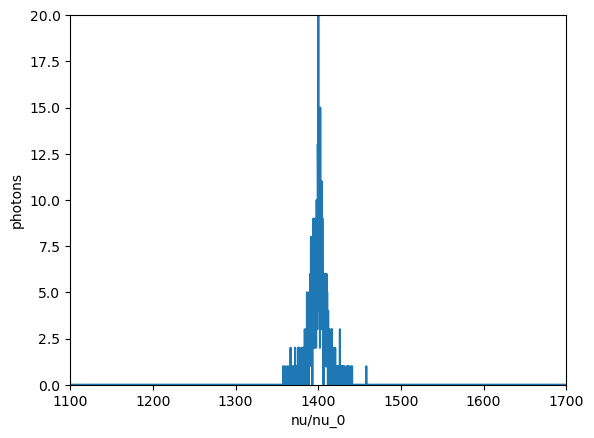

In [18]:
# try plotting it

plt.clf()
plt.plot(spectrum_obj.freqs*1400./spectrum_obj.freq_fact,spectrum_obj.spectrum)
plt.xlabel('nu/nu_0')
plt.ylabel('photons')
plt.xlim([1100,1700])
plt.ylim([0,20])
plt.plot(spectrum_obj.freqs*1400.,spectrum_obj.spectrum_single)
#plt.plot(freqs*1400., spectrum_double)
#plt.plot(freqs*1400., spectrum_more)


In [8]:
norm = max(spectrum_single)

out = np.column_stack((freqs/freq_fact*1400., spectrum/norm, spectrum_single/norm, spectrum_double/norm, spectrum_more/norm))

wavelength = 1400./freqs*freq_fact
factor = freqs*freqs*freqs/freq_fact/freq_fact/freq_fact

norm = max(spectrum_single*factor)
out2 = np.column_stack((wavelength,                   #0 
                        spectrum*factor/norm,         #1
                        spectrum_single*factor/norm,  #2
                        spectrum_double*factor/norm,  #3
                        spectrum_more*factor/norm))   #4


outfilename = "scattering_kappa{kappa:0.1f}_vel{vel:1.0f}.txt".format(kappa=kappa,vel=vel)
np.savetxt(outfilename,np.flipud(out2))

In [96]:
print(outfilename)

scattering_kappa30.0_vel1000.txt


In [97]:
print(hit_count)
print(interactions)


1814167
45


In [98]:
real_old_data=np.loadtxt("/Users/darach/Downloads/output_k0.1.txt")
old_data=np.loadtxt("/Users/darach/Downloads/output_k1.0.txt")
hires_old_data=np.loadtxt("/Users/darach/Downloads/output_k1.0_hires.txt")
hires_broad_data=np.loadtxt("/Users/darach/Downloads/output_k1.0_500kms_hires.txt")
new_data=np.loadtxt("/Users/darach/Downloads/output_k5.0_hires.txt")
hires_new_data=np.loadtxt("/Users/darach/Downloads/output_k10.0_hires.txt")
hires_50_data=np.loadtxt("/Users/darach/Downloads/output_k50.0_hires.txt")
# old_data=np.loadtxt("/Users/darach/Downloads/output_morephotons.txt")
# new_write=np.loadtxt("/Users/darach/Downloads/output_morephotons_moreSR.txt")
current_data = np.loadtxt(outfilename)

$\tau=3.0$, vel=1000


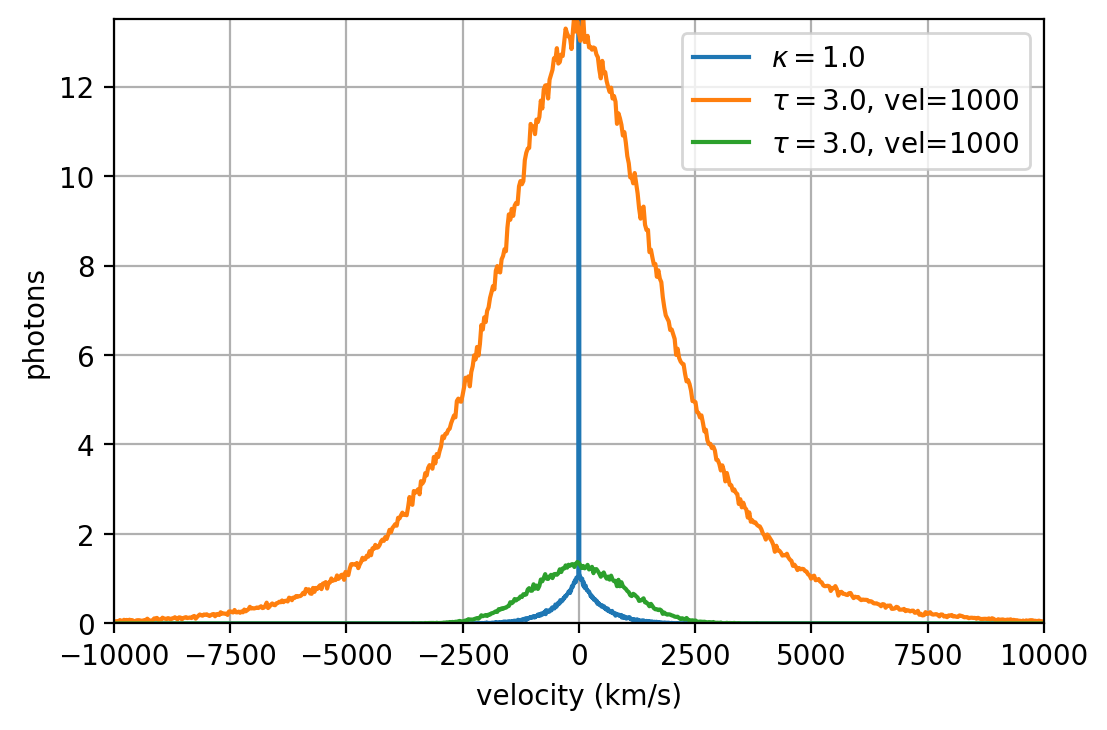

In [100]:
fig = plt.figure(figsize=(6,4),dpi=200)
# plt.plot(wavelength, spectrum_single*factor/norm, label='new')
tau = -kappa*(R_inner-R_outer)

# plt.plot(300000*(real_old_data[:,0]-1400)/1400, real_old_data[:,1]*1.0, label=r'$\kappa=0.1$')
plt.plot(300000*(hires_old_data[:,0]-1400)/1400, hires_old_data[:,1]*1.0, label=r'$\kappa=1.0$')
# plt.plot(300000*(new_data[:,0]-1400)/1400, new_data[:,1], label=r'$\kappa=5.0$')
# plt.plot(300000*(hires_broad_data[:,0]-1400)/1400, hires_broad_data[:,1], label=r'$\kappa=1.0$ broad')
# plt.plot(300000*(hires_50_data[:,0]-1400)/1400, hires_50_data[:,1], label=r'$\kappa=50.0$')
label = r"$\tau={tau:0.1f}$, vel={vel:0.0f}".format(tau=tau,vel=vel)
print(label)
plt.plot(300000*(current_data[:,0]-1400)/1400, current_data[:,1], label=label)
plt.plot(300000*(current_data[:,0]-1400)/1400, current_data[:,1]-current_data[:,2:].sum(axis=1), label=label)
# plt.plot(300000*(current_data[:,0]-1400)/1400, current_data[:,2:].sum(axis=1), label=label)
# plt.plot(300000*(current_data[:,0]-1400)/1400, current_data[:,3], label=label)
# plt.plot(300000*(current_data[:,0]-1400)/1400, current_data[:,4], label=label)


plt.xlabel('velocity (km/s)')
plt.ylabel('photons')
plt.xlim([-10000,10000])
plt.ylim([0,13.5])
plt.legend()
plt.grid()



In [101]:
print((current_data[:,1]-current_data[:,2:].sum(axis=1)).sum()/(current_data[:,1].sum()), (hires_old_data[:,1]-hires_old_data[:,2:].sum(axis=1)).sum()/(hires_old_data[:,1].sum()))
print(np.exp(-tau))


0.04987204647535574 0.9050388086884543
0.04978706836786381


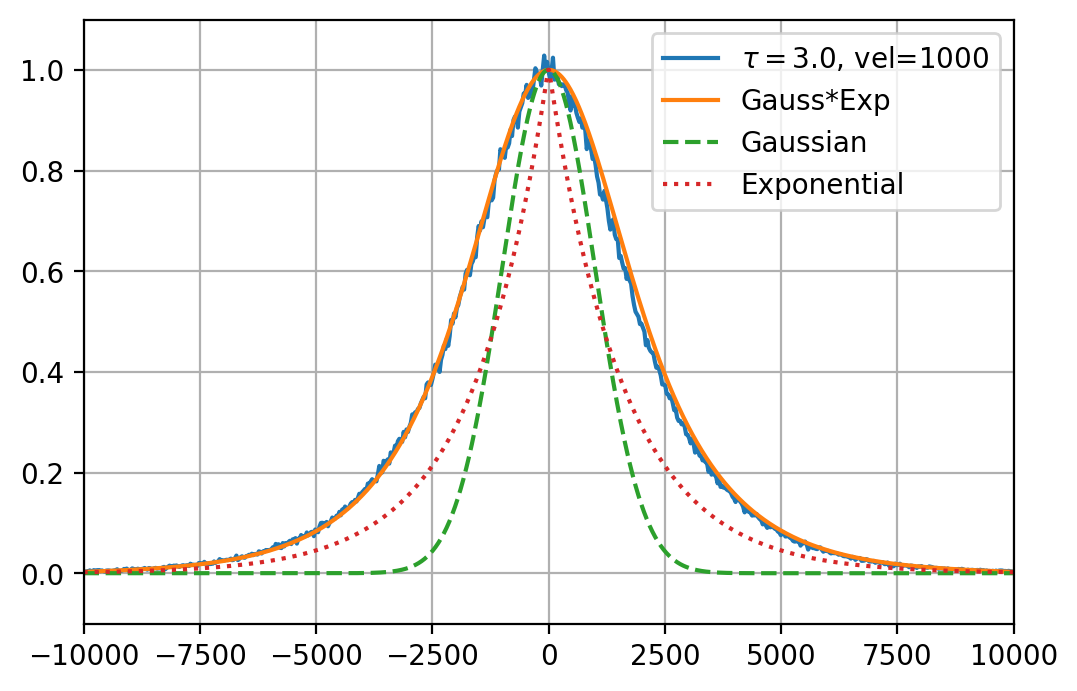

In [107]:
def double_exp(x,center,amplitude,sigma):
    return amplitude*np.exp(-np.abs(x-center)/sigma)

def gaussian_conv(x, sigma, ampl):
    return ampl*np.exp(-x**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

def convolved_exp(x, center, sigma, lam, amplitude, gauss_ampl):
    X = x - center
    fullconv = amplitude*np.convolve(np.exp(-lam*np.abs(X)), gaussian_conv(X, sigma, gauss_ampl), mode='full')
    offs = np.nanargmin(np.abs(X))
    return fullconv[offs:offs+len(x)]
    
x_values = np.linspace(-10000, 10000, 1000)

sigma_value = 1000
lam_value = 0.00062
center_value=0.0
gauss_ampl_value = 1.0
# center_value=4.5
result = convolved_exp(x_values, center=center_value, sigma=sigma_value, 
                       lam=lam_value, amplitude=1.51, gauss_ampl=gauss_ampl_value)
# dey = double_exp(x_values, center=center_value,amplitude=18.0,sigma=1.25/lam_value)
# con = gaussian_conv(x_values-center_value,sigma=1.85*sigma_value,ampl=gauss_ampl_value)
dey = double_exp(x_values, center=center_value,amplitude=18.0,sigma=1.0/lam_value)
con = gaussian_conv(x_values-center_value,sigma=1.0*sigma_value,ampl=gauss_ampl_value)
fig = plt.figure(figsize=(6,4),dpi=200)
norm = np.median(current_data[current_data[:,1].argmax()-1:current_data[:,1].argmax()+2,1])
plt.plot(300000*(current_data[:,0]-1400)/1400, current_data[:,1]/norm, label=label)
plt.plot(x_values,result/result.max(),label='Gauss*Exp')
plt.plot(x_values,con/con.max(),'--',label='Gaussian')
plt.plot(x_values,dey/dey.max(),':',label='Exponential')
plt.legend(loc='best')
plt.xlim([-10000,10000])
plt.ylim(-0.1,1.1)
plt.grid()